# Проект "Анализ A/B-теста для интернет-магазина"

<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Цели-и-задачи-проекта" data-toc-modified-id="Цели-и-задачи-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Цели и задачи проекта</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Загрузка,-обзор-и-подготовка-данных" data-toc-modified-id="Загрузка,-обзор-и-подготовка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Загрузка, обзор и подготовка данных</a></span></li><li><span><a href="#Приоритезация-гипотез" data-toc-modified-id="Приоритезация-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Приоритезация гипотез</a></span></li><li><span><a href="#Анализ-A/B-теста" data-toc-modified-id="Анализ-A/B-теста-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Анализ A/B-теста</a></span><ul class="toc-item"><li><span><a href="#Параметры-A/B-теста" data-toc-modified-id="Параметры-A/B-теста-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Параметры A/B-теста</a></span></li><li><span><a href="#Предварительная-проверка-выборок" data-toc-modified-id="Предварительная-проверка-выборок-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Предварительная проверка выборок</a></span></li><li><span><a href="#Анализ-кумулятивных-значений" data-toc-modified-id="Анализ-кумулятивных-значений-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Анализ кумулятивных значений</a></span></li><li><span><a href="#Анализ-выбросов-в-данных" data-toc-modified-id="Анализ-выбросов-в-данных-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Анализ выбросов в данных</a></span></li><li><span><a href="#Сравнительный-анализ-неочищенных-и-очищенных-данных" data-toc-modified-id="Сравнительный-анализ-неочищенных-и-очищенных-данных-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Сравнительный анализ неочищенных и очищенных данных</a></span></li><li><span><a href="#Дополнительный-раздел.-Графики-без-аномалий" data-toc-modified-id="Дополнительный-раздел.-Графики-без-аномалий-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Дополнительный раздел. Графики без аномалий</a></span></li></ul></li><li><span><a href="#Выводы-и-рекомендации" data-toc-modified-id="Выводы-и-рекомендации-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы и рекомендации</a></span></li></ul></div>

## Цели и задачи проекта

**Описание проекта**:  
Подготовлен список гипотез для увеличения выручки. Необходимо приоритизировать гипотезы и проанализировать результаты одного из A/B тестов.

**Цель исследования**:    
Принять решение об остановке или продолжении A/B теста и его успешности.

**Инструменты**:  
- Yupyter Notebook (Anaconda 2.3.2, Python 3.9.13)
- Локальное окружение [da_practicum_env.yml](https://code.s3.yandex.net/data-analyst/da_practicum_env.yml)
- Расширение toc2 для Jupyter Notebook

**Рабочие файлы**:  
- `hypothesis.csv` — информация о гипотезах
- `orders.csv` — информация о заказах
- `visitors.csv` — информация о количестве посетителей

**Ход исследования**:   
Исследование пройдет в 5 этапов:
1. **Загрузка, обзор и подготовка данных** - Ознакомимся с данными и подготовим их к анализу
2. **Приоритезация гипотез** - Приоритезируем гипотезы во фреймворках ICE и RICE
3. **Анализ кумулятивных значений** - Проанализируем кумулятивные значения выручки, среднего чека и количества заказов по группам A/B-теста
4. **Анализ выбросов в данных** - Сделаем оценку аномальных значений в данных и устраним их
5. **Сравнительный анализ неочищенных и очищенных данных** - Проанализируем с помощью статистических тестов различия в среднем чеке и количестве заказов по группам A/B-теста по неочищенным и очищенным от выбросов данным
6. **Дополнительный раздел. Графики без аномалий** - Построим новые графики кумулятивных параметров без аномалий там, где это возможно

## Описание данных

Структура датасета `hypothesis.csv`:

- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Структура датасета `orders.csv`:
- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.

Структура датасета `visitors.csv`:
- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста


## Загрузка, обзор и подготовка данных

Импортируем библиотеки

In [1]:
import pandas as pd
from scipy import stats as st
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
import os

Загружаем данные

*Внимание: датасеты защищены авторским правом Яндекс Практикума и не приложены к проекту.*

In [2]:
# функция для загрузки с запасным путем

def try_ex(way_1,way_2):
    try:
        df = pd.read_csv(way_1, sep=',')
    except:
        df = pd.read_csv(way_2, sep=',')
    return df

# загружаем данные

visitors = try_ex('visitors.csv',
                '')
orders = try_ex('orders.csv',
                'https://code.s3.yandex.net/datasets/orders.csv')
hypothesis = try_ex('hypothesis.csv',
               '')

Делаем обзор данных

In [3]:
# функция для обзора

def data_review (data_import):
    print(data_import.info())
    pd.set_option('display.max_columns', None)
    print(display(data_import.head()))                     
    print('')
    print('Пропуски:')
    print(data_import.isna().sum())
    print('')
    print('Явные дубликаты:',data_import.duplicated().sum())
    print('')
    print('Основные статистики:')
    print(display(data_import.describe()))

In [4]:
# делаем обзор

data_review(hypothesis)
data_review(visitors)
data_review(orders)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


None

Пропуски:
Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

Явные дубликаты: 0

Основные статистики:


,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


None

Пропуски:
date        0
group       0
visitors    0
dtype: int64

Явные дубликаты: 0

Основные статистики:


,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


None

Пропуски:
transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

Явные дубликаты: 0

Основные статистики:


,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


None


Выводы о проблемах с данными:
- Пропусков нет
- Явных дубликатов нет
- Можно переименовать некоторые столбцы
- Типы данных соответствуют своим значениям, кроме колонок со временем. Их необходимо привести к типу datetime

Выполняем предобработку данных: меняем типы данных и имена столбцов

In [5]:
# приводим столбцы с датой к типу datetime

orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [6]:
# переименуем столбцы
hypothesis.columns = hypothesis.columns.str.lower()

## Приоритезация гипотез

Посмотрим на датасет c гипотезами

In [7]:
# увеличим максимальную ширину столбца при выводе
pd.set_option('display.max_colwidth', 120)

display(hypothesis)

# вернем максимальную ширину столбца к дефолтной
pd.reset_option('display.max_colwidth')

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


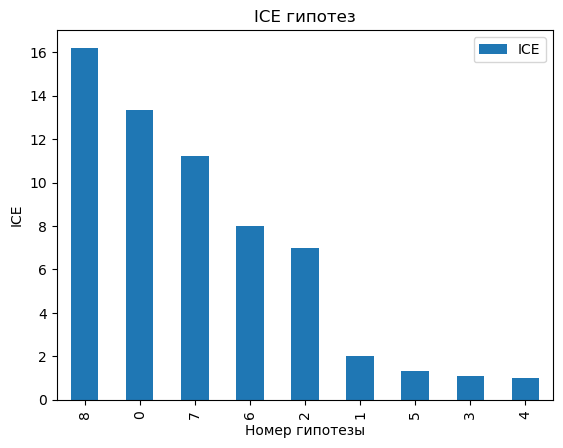

In [8]:
# увеличим максимальную ширину столбца при выводе
pd.set_option('display.max_colwidth', 120)

# считаем целевой параметр ICE
hypothesis['ICE'] = round(hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'],2)
display(hypothesis[['hypothesis','ICE']].sort_values(by='ICE',ascending=False))

# строим столбчатую диаграмму приоритетов
hypothesis[['hypothesis','ICE']].sort_values(by='ICE',ascending=False).plot(kind='bar')
plt.title('ICE гипотез')
plt.xlabel('Номер гипотезы')
plt.ylabel('ICE')
plt.show()

# вернем максимальную ширину столбца к дефолтной
pd.reset_option('display.max_colwidth')

Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


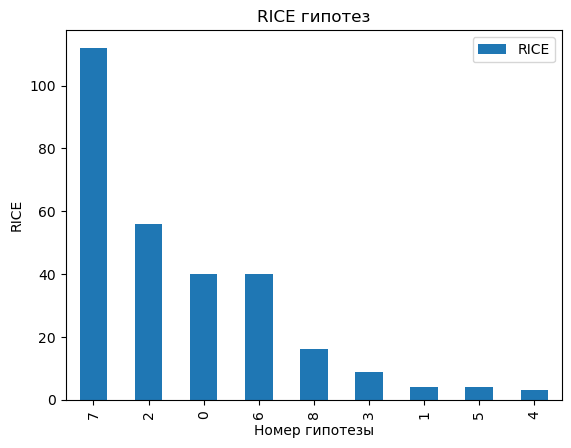

In [9]:
# увеличим максимальную ширину столбца при выводе
pd.set_option('display.max_colwidth', 120)

# считаем целевой параметр ICE
hypothesis['RICE'] = round(hypothesis['impact'] * hypothesis['confidence'] * hypothesis['reach'] / hypothesis['efforts'],2)
display(hypothesis[['hypothesis','RICE']].sort_values(by='RICE',ascending=False))

# строим столбчатую диаграмму приоритетов
hypothesis[['hypothesis','RICE']].sort_values(by='RICE',ascending=False).plot(kind='bar')
# добавим заголовок, подпишем оси и добавим легенду
plt.title('RICE гипотез')
plt.xlabel('Номер гипотезы')
plt.ylabel('RICE')
plt.show()

# вернем максимальную ширину столбца к дефолтной
pd.reset_option('display.max_colwidth')

**Выводы:**
- Уровень приоритезации для одних и тех же гипотез во фреймворках ICE и RICE различен. На изменение приоритезации повлиял параметр reach - охват пользователей. Во фреймворке RICE явный лидер - 7 гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", хотя во фреймворке ICE у нее 3 уровень приоритета. Видимо, 7 гипотеза затронет большое количество пользователей, так как форма подписки будет добавлена на все основные страницы сайта. А вот 8 гипотеза "Запустить акцию, дающую скидку на товар в день рождения" хотя имеет первый уровень приоритета во фреймворке ICE, в RICE она всего лишь на 5 месте, так как затронет очень небольшое количество пользователей, у которых день рождения выпало на дни проведения скидочной акции. **В первую очередь рекомендуется проверить 7 гипотезу.**

## Анализ A/B-теста

### Параметры A/B-теста

Наш A/B-тест является парным, в нем сраниваются две группы A и B.

In [10]:
print(min(visitors['date']).date())
print(max(visitors['date']).date())
print((max(visitors['date'])-min(visitors['date'])).days)

2019-08-01
2019-08-31
30


Наш A/B-тест проводился с 1 августа по 31 августа 2019 года. Длительность теста составила 30 дней.

### Предварительная проверка выборок

Проверим, нет ли в данных пользователей, участвовавших в нескольких группах теста одновременно. Из-за недостатка данных, мы можем сделать это только для платящих пользователей. Проверим хотя бы их.

In [11]:
ordersA = pd.Series(orders[orders['group'] == 'A']['visitorId'].unique())
ordersB = pd.Series(orders[orders['group'] == 'B']['visitorId'].unique())

print('Всего платящих пользователей в группе A:',ordersA.count())
print('Всего платящих пользователей в группе B:',ordersB.count())
print('Платящие пользователи, попавшие в обе группы:',ordersA[ordersA.isin(ordersB)].count())
print('Процент таких пользователей в группе A: {0:.1%}'.format(ordersA[ordersA.isin(ordersB)].count()/ordersA.count()))
print('Процент таких пользователей в группе B: {0:.1%}'.format(ordersA[ordersA.isin(ordersB)].count()/ordersB.count()))

Всего платящих пользователей в группе A: 503
Всего платящих пользователей в группе B: 586
Платящие пользователи, попавшие в обе группы: 58
Процент таких пользователей в группе A: 11.5%
Процент таких пользователей в группе B: 9.9%


Да, действительно есть 58 пользователей, попавших в обе группы. Однако мы не можем их исключить из дальнейших расчетов, т.к. у нас нет данных, какие из этих пользователей были посетителями. Также из-за недостатка данных мы не можем уточнить, какие из неплатящих пользователей попали в обе группы A/B-теста. Еще полезно было бы сравнить размеры выборок двух групп A/B-теста, но и этого мы сделать не можем из-за того же недостатка данных. В связи с этим оставим данные как есть.

### Анализ кумулятивных значений

Подготовим данные для расчетов

In [12]:
# количество посетителей группы A в день
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# количество посетителей группы A с накоплением 
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}),
    axis=1,)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

# количество посетителей группы B в день 
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

# количество посетителей группы B с накоплением
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}),
    axis=1,)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

# количество заказов и выручка группы A в день
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}))
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# количество заказов и выручка группы A с накоплением
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = ['date','ordersCummulativeA','revenueCummulativeA',]

# количество заказов и выручка группы B в день
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}))
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

# количество заказов и выручка группы B с накоплением
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = ['date','ordersCummulativeB','revenueCummulativeB',]

# объединяем все данные
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left')
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left'))

display(data.head(5))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Пояснения к столбцам в подготовленном для анализа датафрейме `data`:

- `date` — дата;
- `ordersPerDateA` — количество заказов в выбранную дату в группе A;
- `revenuePerDateA` — суммарная выручка в выбранную дату в группе A;
- `ordersPerDateB` — количество заказов в выбранную дату в группе B;
- `revenuePerDateB` — суммарная выручка в выбранную дату в группе B;
- `ordersCummulativeA` — суммарное число заказов до выбранной даты включительно в группе A;
- `revenueCummulativeA` — суммарная выручка до выбранной даты включительно в группе A;
- `ordersCummulativeB` — суммарное количество заказов до выбранной даты включительно в группе B;
- `revenueCummulativeB` — суммарная выручка до выбранной даты включительно в группе B;
- `visitorsPerDateA` — количество пользователей в выбранную дату в группе A;
- `visitorsPerDateB` — количество пользователей в выбранную дату в группе B;
- `visitorsCummulativeA` — количество пользователей до выбранной даты включительно в группе A;
- `visitorsCummulativeB` — количество пользователей до выбранной даты включительно в группе B.

Построим график кумулятивной выручки по группам.

In [13]:
# найдем максимальную и минимальную даты
# они будут нужны для улучшения отображения оси абсцисс

min_date = min(data['date'])
max_date = max(data['date'])

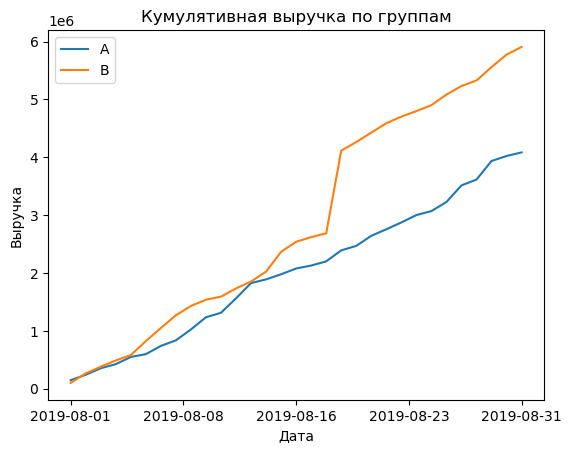

In [14]:
# cтроим график выручки группы А
plt.plot(data['date'], data['revenueCummulativeA'], label='A')

# cтроим график выручки группы B
plt.plot(data['date'], data['revenueCummulativeB'], label='B')

# улучшаем отображение значений на горизонтальной оси
plt.xticks(pd.date_range(min_date, max_date, 5))

# добавим заголовок, подпишем оси и добавим легенду
plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend()

plt.show()

**Выводы:**
- Выручка увеличивается в течение всего теста. График выручки группы A - равномерно. График выручки группы B неравномерно - в одном промежутке фиксируется резкий рост. Это может говорить о всплесках числа заказов и/или о появлении очень дорогих заказов в выборке группы B.

Построим график кумулятивного среднего чека по группам.

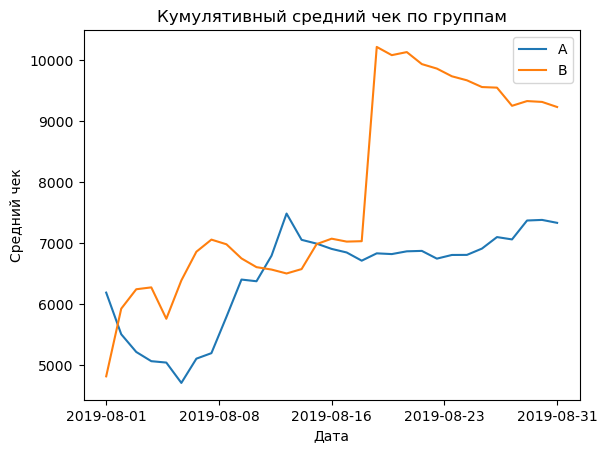

In [15]:
# строим график кумулятивного среднего чека группы А
plt.plot(data['date'], data['revenueCummulativeA']/data['ordersCummulativeA'], label='A')

# строим график кумулятивного среднего чека группы B
plt.plot(data['date'], data['revenueCummulativeB']/data['ordersCummulativeB'], label='B')

# улучшаем отображение значений на горизонтальной оси
plt.xticks(pd.date_range(min_date, max_date, 5))

# добавим заголовок, подпишем оси и добавим легенду
plt.title('Кумулятивный средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend()

plt.show()

**Выводы:**
- Средний чек группы B показывает резкий рост примерно за те же даты, что и выручка. Скорее всего произошел резкий всплеск аномально дорогих заказов в это время.

Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

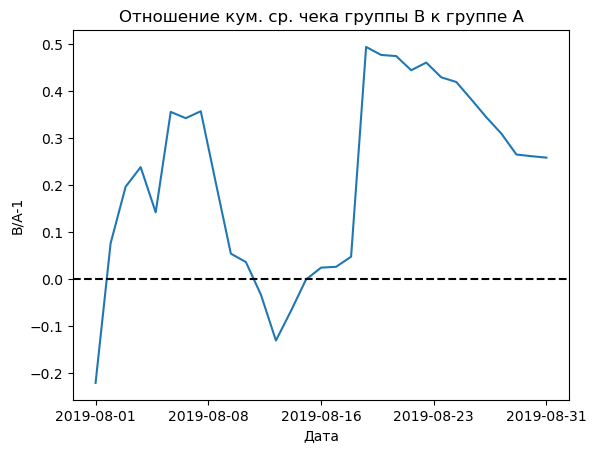

In [16]:
# cтроим отношение средних чеков
plt.plot(data['date'], (data['revenueCummulativeB']/data['ordersCummulativeB'])/(data['revenueCummulativeA']/data['ordersCummulativeA'])-1)

# добавляем горизонтальную линию
plt.axhline(y=0, color='black', linestyle='--')

# улучшаем отображение значений на горизонтальной оси
plt.xticks(pd.date_range(min_date, max_date, 5))

# добавим заголовок, подпишем оси
plt.title('Отношение кум. ср. чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('B/A-1')

plt.show()

**Выводы:**
- График резко меняется. Вначале теста выигрывала группа A, потом начала выигрывать группа B, потом снова группа A. К концу теста группа B явно выигрывает по сравнению с группой A. Однако, по данному графику что-то однозначное сказать нельзя: слишком резкие колебания, значения не устоялись. Вероятно, влияют выбросы в данных.

Построим график кумулятивного среднего количества заказов на посетителя по группам.

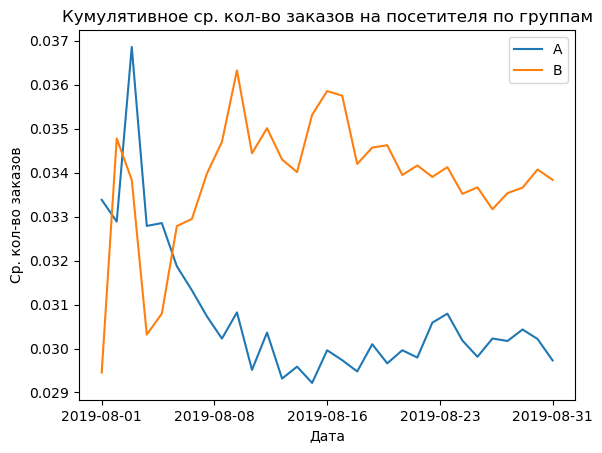

In [17]:
# строим график кумулятивного среднего количества заказов группы А
plt.plot(data['date'], data['ordersCummulativeA']/data['visitorsCummulativeA'], label='A')

# строим график кумулятивного среднего количества заказов группы B
plt.plot(data['date'], data['ordersCummulativeB']/data['visitorsCummulativeB'], label='B')

# улучшаем отображение значений на горизонтальной оси
plt.xticks(pd.date_range(min_date, max_date, 5))

# добавим заголовок, подпишем оси и добавим легенду
plt.title('Кумулятивное ср. кол-во заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Ср. кол-во заказов')
plt.legend()

plt.show()

**Выводы:**
- Вначале количество заказов резко меняется и группа B проигрывает, но затем она вырывается вперед и разница постепенно устанавливается. По итогам группа B явно выигрывает.

Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

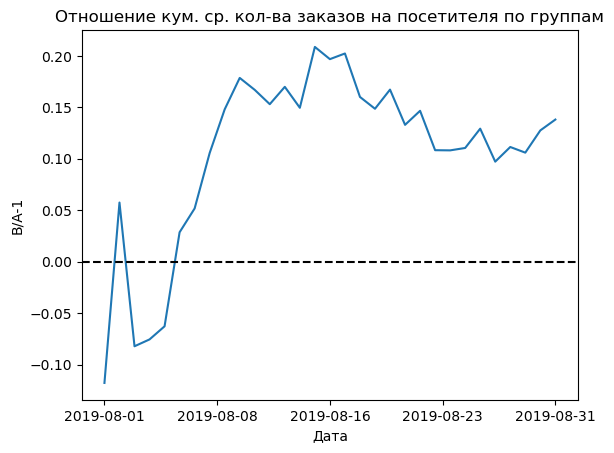

In [18]:
# cтроим отношение количества заказов на посетителя
plt.plot(data['date'], 
        (data['ordersCummulativeB']/data['visitorsCummulativeB'])/
        (data['ordersCummulativeA']/data['visitorsCummulativeA'])-1)

# добавляем горизонтальную линию
plt.axhline(y=0, color='black', linestyle='--')

# улучшаем отображение значений на горизонтальной оси
plt.xticks(pd.date_range(min_date, max_date, 5))

# добавим заголовок, подпишем оси
plt.title('Отношение кум. ср. кол-ва заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('B/A-1')

plt.show()

**Выводы:**
- В начале теста группа B значительно проигрывала группе A, но затем вырвалась вперёд и стабильно удерживает лидерство.

### Анализ выбросов в данных

Построим точечный график количества заказов по пользователям.

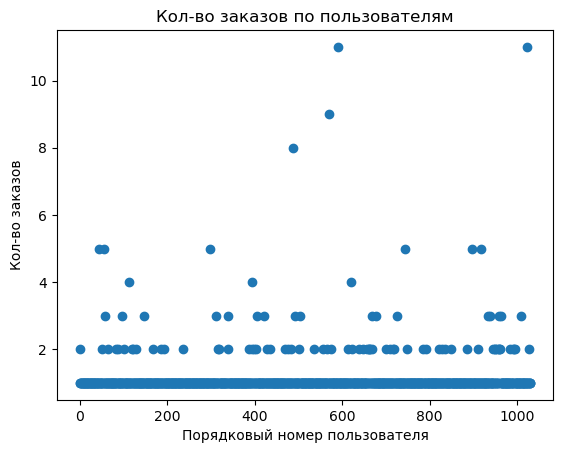

In [19]:
# считаем количество заказов по пользователям
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'}))
ordersByUsers.columns = ['visitorId', 'orders']

# задаем значения горизонтальной оси
x_values = pd.Series(range(0,len(ordersByUsers)))

# строим график
plt.scatter(x_values, ordersByUsers['orders'])

# добавим заголовок, подпишем оси
plt.title('Кол-во заказов по пользователям')
plt.xlabel('Порядковый номер пользователя')
plt.ylabel('Кол-во заказов')

plt.show()

**Выводы:**
- В данных определенно есть выбросы. На 1 пользователя в основном приходится 1 заказ. Предварительно "на глаз" границу аномальных заказов можно оценить в 2-3 заказа.

Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.

In [20]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


**Выводы:**
- 2 заказа попадают на 95 перцентиль и  какое-то количество пользователей с 2-мя заказами потенциально может выйти за 5%-ую границу (можно дополнительно проверить, где точно находится эта граница, но это нам сейчас не нужно) и если мы возьмем за границу аномальных значений 2 и больше, то можем отсеить более 5% наблюдений. Поэтому аномалиями лучше с запасом считать значения больше 2 заказов - а именно 3 и больше. Так как на 95 перцентиль приходится 2 заказа, а на 99 перцентиль - 4 заказа, то 3 заказа находятся между 95 и 99 перцентилями, а значит в таком случае будет отсеяно от 1% до 5% наблюдений, что удовлетворяет статистическим правилам.

Построим точечный график стоимостей заказов.

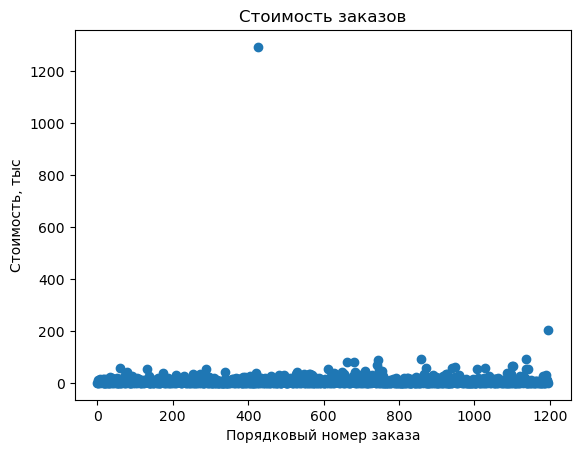

In [21]:
# задаем значения горизонтальной оси
x_values = pd.Series(range(0,len(orders['revenue'])))

# строим график, задав стомиость в тысячах единиц
plt.scatter(x_values, orders['revenue']/1000)

# добавим заголовок, подпишем оси
plt.title('Стоимость заказов')
plt.xlabel('Порядковый номер заказа')
plt.ylabel('Стоимость, тыс')

plt.show()

**Выводы:**
- Аномалий в стоимости заказов не так уж много, но они очень большие. Возможно аномалий горадно больше, просто на графике мы увидели две самые выдающиеся, которые подавили остальные. График в данном случае не показателем, лучше посмотреть на перцентили. Пока "на глаз" хочется сказать, что аномалии лежат за границами 100 тыс.

Для более точной визуальной оценки аномалий сделаем дополнительный график без двух самых больших выбросов

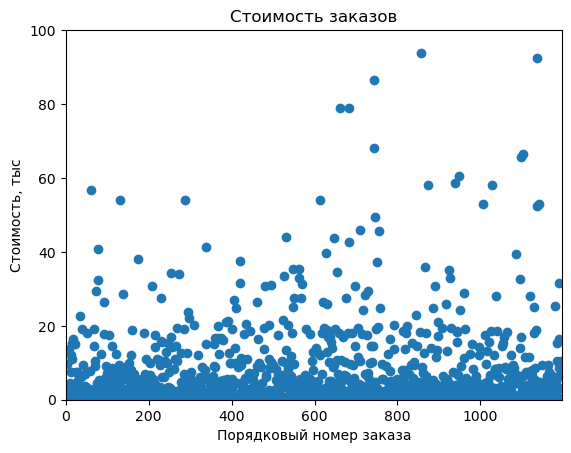

In [22]:
# задаем значения горизонтальной оси
x_values = pd.Series(range(0,len(orders['revenue'])))

# строим график, задав стомиость в тысячах единиц
plt.scatter(x_values, orders['revenue']/1000)

# добавим заголовок, подпишем оси
plt.title('Стоимость заказов')
plt.xlabel('Порядковый номер заказа')
plt.ylabel('Стоимость, тыс')

plt.axis([0, len(orders['revenue']), 0, 100])

plt.show()

**Выводы:**
- Визуально выбросами скорее можно считать значения за пределами примерно 20-40 тыс.

Посчитаем 95-й и 99-й перцентили стоимости заказов.

In [23]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


**Выводы:**
- Границу в стоимости заказов можно принять по 95 перцентилю в 28 тыс, тогда мы отбросим не более 5 % всех значений.

Отберем аномальных пользователей

In [24]:
# считаем количество заказов по пользователям группы A

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique}))
ordersByUsersA.columns = ['visitorId', 'orders']

# считаем количество заказов по пользователям группы B

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique}))
ordersByUsersB.columns = ['visitorId', 'orders']

In [25]:
# отбираем пользователей с аномальным числом заказов
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'],95)]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'],95)]['visitorId'],
    ],
    axis=0,
)

# отбираем пользователей с аномальной стоимостью заказов
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'],95)]['visitorId']

# объединяем всех аномальных пользователей
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print('Всего пользователей, сделавших хотя бы 1 заказ:',orders['visitorId'].nunique())
print('Количество аномальных пользователей:',abnormalUsers.shape[0])
print('Процент аномальных пользователей: {0:.1%}'.format(abnormalUsers.shape[0]/orders['visitorId'].nunique()))

Всего пользователей, сделавших хотя бы 1 заказ: 1031
Количество аномальных пользователей: 74
Процент аномальных пользователей: 7.2%


### Сравнительный анализ неочищенных и очищенных данных

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Раннее мы посчитали количество заказов на посетителей, которые хотя бы раз делали заказ (в датасете `orders` в принципе не может быть пользователей, не делавших заказов). Но так как нам нужно сравнить среднее количество заказов не на платящего пользователя, а именно на посетителя, а также то, что для проведения непараметрического теста Манна-Уитни, который мы хотим использовать, необходимо равенство размеров выборок, то перед проведением стат. теста, необходимо восстановить изначальную выборку всех пользователей, добавив посетителей, которые ни разу не далали заказ. Их количество равно разнице между суммой всех уникальных посетителей и суммой уникальных посетителей, сделавших хотя бы один заказ. Однако, мы не можем этого сделать, потому что у нас нет данных об уникальных идентификаторах тех посетителей, которые не сделали ни одного заказа (в отличие от тех, кто сделал хотя бы один заказ). Поэтому сделаем менее точный вариант: найдем просто разницу между количеством всех посетителей и количеством уникальных посетителей, сделавших хотя бы один заказ. На месте количества заказов для этих посетителей поставим нули.

**Нулевая гипотеза H0:** Различия в среднем количестве заказов на пользователя между неочищенными от выбросов группами A/B-теста нет  
**Альтернативная гипотеза H1:** Различие в среднем количестве заказов на пользователя между неочищенными от выбросов группами A/B-теста есть

In [26]:
# добавляем нули пользователям группы A, которые ничего не заказали

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['visitorId'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# добавляем нули пользователям группы B, которые ничего не заказали

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['visitorId'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# считаем p-value тестом Манна-Уитни
print('p-value: {0:.3f}'.format(st.mannwhitneyu(sampleA, sampleB)[1]))

# считаем во сколько раз среднее число заказов на пользователя в группе B больше, чем в группе A
print('difference: {0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.017
difference: 0.138


**Выводы:** 
- По неочищенным данным статистически значимое различие в среднем количестве заказов на посетителя есть, так как p-value < 0.05. Среднее количество заказов по неочищенным данным в группе B больше на 13.8%, чем в группе A. **Отвергаем нулевую гипотезу.**

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

**Нулевая гипотеза H0:** Различия в среднем чеке между неочищенными от выбросов группами A/B-теста нет  
**Альтернативная гипотеза H1:** Различие в среднем чеке между неочищенными от выбросов группами A/B-теста есть

In [27]:
# считаем p-value тестом Манна-Уитни
print('p-value: {0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

# считаем во сколько раз средний чек в группе B больше, чем в группе A
print('difference: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.729
difference: 0.259


**Выводы:**
- По неочищенным данным, не смотря на то, что средний чек в группе B оказался на 25.9% больше, чем в группе A, статистически значимого различия в среднем чеке групп A и B нет, так как p-value > 0.05, причем значительно. **Не отвергаем нулевую гипотезу**

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

**Нулевая гипотеза H0:** Различия в среднем количестве заказов на пользователя между очищенными от выбросов группами A/B-теста нет  
**Альтернативная гипотеза H1:** Различие в среднем количестве заказов на пользователя между очищенными от выбросов группами A/B-теста есть

In [28]:
# устраняем аномальных пользователей в группе A
# добавляем нули пользователям группы A, которые ничего не заказали

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['visitorId'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# устраняем аномальных пользователей в группе B
# добавляем нули пользователям группы B, которые ничего не заказали


sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['visitorId'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# считаем p-value тестом Манна-Уитни
print('p-value: {0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

# считаем во сколько раз среднее число заказов на пользователя в группе B больше, чем в группе A
print('difference: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value: 0.013
difference: 0.173


**Выводы:**
- По очищенным данным статистически значимое различие в среднем количестве заказов на посетителя также (как и по неочищенным данным) есть, так как p-value < 0.05. Среднее количество заказов по очищенным данным в группе B больше на 17.3%, чем в группе A. **Отвергаем нулевую гипотезу**

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

**Нулевая гипотеза H0:** Различия в среднем чеке между очищенными от выбросов группами A/B-теста нет  
**Альтернативная гипотеза H1:** Различие в среднем чеке между очищенными от выбросов группами A/B-теста есть

In [29]:
# устранаяем аномальных пользователей
# считаем p-value тестом Манна-Уитни

print(
    'p-value: {0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

# устранаяем аномальных пользователей
# считаем во сколько раз средний чек в группе B больше, чем в группе A

print(
    'difference: {0:.3f}'.format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value: 0.738
difference: -0.020


**Выводы:**
- По очищенным данным статистически значимого различия в среднем чеке групп A и B нет (как и по неочищенным данным), так как p-value > 0.05, причем значительно. По очищенным данным средний чек в группе B на 2.0% меньше, чем в группе A. **Не отвергаем нулевую гипотезу**

### Дополнительный раздел. Графики без аномалий

Построим график кумулятивной выручки по группам без выбросов.

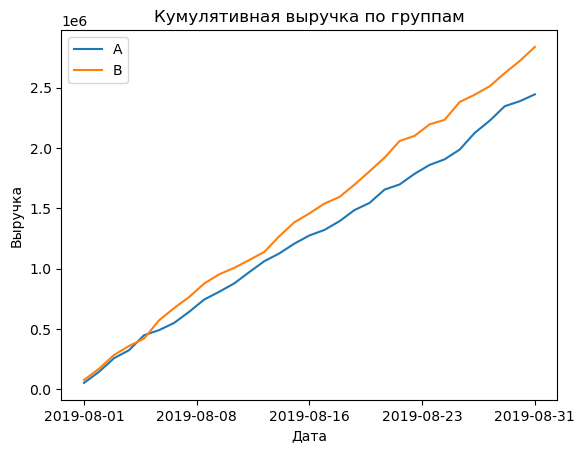

In [30]:
# отберем заказы без аномальных пользователей
orders_filtered = orders[np.logical_not(
    orders['visitorId'].isin(abnormalUsers))]

# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders_filtered[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
cumulativeData = datesGroups.apply(
    lambda x: orders_filtered[np.logical_and(orders_filtered['date'] <= x['date'],
                                    orders_filtered['group'] == x['group'])]
    .agg({'date' : 'max', 
          'group' : 'max', 
          'transactionId' : 'nunique',
          'visitorId' : 'nunique',
          'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue']

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# cтроим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# cтроим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

# улучшаем отображение значений на горизонтальной оси
min_date = min(data['date'])
max_date = max(data['date'])
plt.xticks(pd.date_range(min_date, max_date, 5))

# добавим заголовок, подпишем оси и добавим легенду
plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend()

plt.show()

**Выводы:** 
- Пользователи с аномальными заказами дествительно влияли на график кумулятивной выручки, теперь выручка равноверно и стабильно растет у обеих групп. При этом выручка группы B стабильно выше группы A.

Построим график кумулятивного среднего чека без выбросов

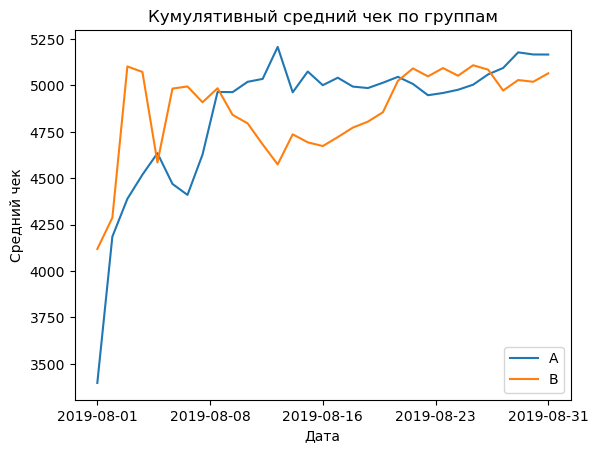

In [31]:
# строим график среднего чека без выбросов
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

# улучшаем отображение значений на горизонтальной оси
plt.xticks(pd.date_range(min_date, max_date, 5))

# добавим заголовок, подпишем оси и добавим легенду
plt.title('Кумулятивный средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend()

plt.show()

**Выводы:**
- Кумулятивный средний чек после удаления выбросов выглядит намного более стабильным, чем по неочищенным данным. Однако колебания есть и сложно сказать, устоялось ли положение. Но в тоже время стоит отметить, что эти колебания идут около некоторого единого значения среднего чека и нельзя сказать, что какая-то из групп имеет тендеции к лидерству.

Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

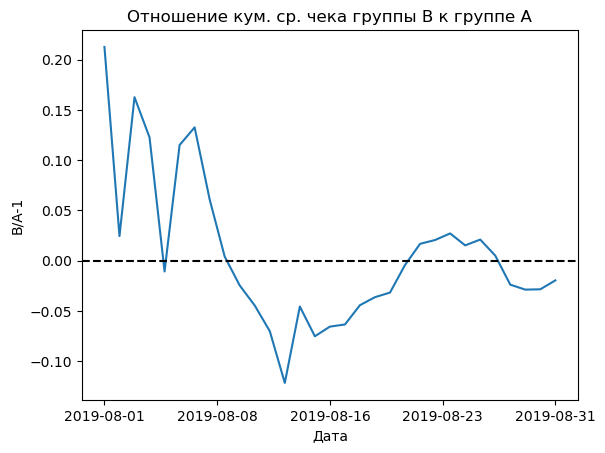

In [32]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем горизонтальную линию
plt.axhline(y=0, color='black', linestyle='--')

# улучшаем отображение значений на горизонтальной оси
plt.xticks(pd.date_range(min_date, max_date, 5))

# добавим заголовок, подпишем оси
plt.title('Отношение кум. ср. чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('B/A-1')

plt.show()

**Выводы:**
- То же самое можно сказать про график относительного различия для среднего чека. Колебания намного меньше, чем без выбросов, но они достаточно существенные для того, чтобы говорить, что ситуация устоялась. Хотя стоит отметить, что колебания идут около нулевой отметки и признаков того, что в ближайшей перспектике какая-то из групп возьмет лидерство, скорее нет. Можно также сделать осторожное предположение, что так как амплитуда колебаний уменьшается, то возможно в будущем значение отношения средних чеков будет постепенно приближаться в нулевой отметке.

Также хорошо было бы построить графики кумулятивного среднего количества заказов на посетителя, чтобы посмотреть на эти графики без аномалий, но мы не может это сделать из-за недостатка данных: у нас нет информации о том, какие именно пользователи были посетителями, поэтому мы не может убрать аномальных пользователей из посетителей.

## Выводы и рекомендации

**В ходе исследования выполнено:**
- Приоритезированы гипотезы во фреймворках ICE и RICE
- Проведен анализ кумулятивных выручки, среднего чека и количества заказов по группам A/B-теста
- Произведена оценка аномалий в данных и их устранение
- С помощью статистических тестов проанализированы различия в среднем чеке и количестве заказов по группам A/B-теста по неочищенным и очищенным от выбросов данным

**Общие выводе по работе:**
- Как по сырым, так и по очищенным данным есть статистически значимое различие в среднем количестве заказов на посетителя групп A и B. Среднее количество заказов по неочищенным данным в группе B больше, чем в группе A, на 13.8% по очищенным - на 17.3%
- Судя по графику кумулятивного среднего количества заказов на посетителя по неочищенным данным, группа B стабильно выигрывает
- Как по сырым, так и по очищенным данным нет статистически значимого различия в среднем чеке групп A и B
- По графикам кумулятивного среднего чека как по очищенным, так и по неочищенным данным нельзя с уверенностью сказать, что значения среднего чека установились, однако можно осторожно предположить, что значения относительного изменения кумулятивного среднего чека группы B к группе A по очищенным данным стремятся к установлению около нуля

**Рекомендации:**
- Исходя из обнаруженных фактов, **тест можно остановить и признать успешным: группа B будет приносить статистически значимо больше выручки, чем группа A**. Однако стоит отметить, что хотя по количеству заказов группа B явно выигрывает, статистически значимой разницы в среднем чеке групп A и B нет.